<a href="https://colab.research.google.com/github/surajsrivathsa/NL2SQL/blob/main/Copy_of_R2SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preamble

Install libraries and load them

In [1]:
# !git clone https://github.com/huybery/r2sql.git

In [2]:
import pickle

In [3]:
# rm -rf "/content/r2sql"

In [4]:

import inspect
import os
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [6]:
# !touch "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/requirement.txt"

In [7]:
# torch==1.0.0
# sqlparse
# pymysql
# progressbar
# nltk
# numpy
# six
# spacy
# transformers==2.10.0


In [8]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/requirement.txt"

     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 665kB 21.0MB/s 
     |████████████████████████████████| 901kB 51.4MB/s 
     |████████████████████████████████| 1.2MB 46.0MB/s 
     |████████████████████████████████| 5.6MB 19.1MB/s 
  Created wheel for progressbar: filename=progressbar-2.5-cp37-none-any.whl size=12083 sha256=c18e6a05b66ee56fadc384da10244fcbc3de1ccea66a11b3805b1aba25fb520c
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built progressbar


In [9]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/NL_2_SQL")
!pwd

/content/drive/MyDrive/Colab Notebooks/NL_2_SQL


In [10]:
import r2sql

In [11]:
#!cp -r "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql_distilbert/cosql" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql"

In [35]:
#!cp -r '/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/results' '/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql'

In [12]:
# !wget "https://huggingface.co/distilbert-base-uncased/blob/main/pytorch_model.bin"

In [13]:
!ls -ltr

total 129
drwx------ 2 root root  4096 Jun 13 08:48 r2sql
-rw------- 1 root root 69360 Jun 16 14:24 main
-rw------- 1 root root 57761 Jun 16 14:32 pytorch_model.bin


In [14]:
# import transformers
# from transformers import DistilBertTokenizer, DistilBertModel
# tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# model = DistilBertModel.from_pretrained("distilbert-base-uncased")

In [15]:
# # tokenizer = BertTokenizer.from_pretrained('distilbert-base-uncased')
# tokenizer.save_pretrained('/content/')
# model.save_pretrained('/content/')

In [16]:
import transformers
from transformers import GPT2Tokenizer, GPT2Model

In [17]:
# tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
# model = GPT2Model.from_pretrained("gpt2")

In [18]:
# tokenizer.save_pretrained('/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/gpt2')
# model.save_pretrained('/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/gpt2')

In [19]:
# !cp "/content/pytorch"

In [20]:
# !cp -r "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/model/bert/data/annotated_wikisql_and_PyTorch_bert_param" "/content/drive/MyDrive"

# !cp "/content/drive/MyDrive/pytorch_model.bin" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/model/bert/data/annotated_wikisql_and_PyTorch_bert_param"

# !cp "/content/drive/MyDrive/config.json" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/model/bert/data/annotated_wikisql_and_PyTorch_bert_param"

# !cp "/content/drive/MyDrive/vocab.txt" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/model/bert/data/annotated_wikisql_and_PyTorch_bert_param"

In [21]:
# !cp -r "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql_distilbert"

In [22]:
# !cp "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/gpt2/pytorch_model.bin" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/model/bert/data/annotated_wikisql_and_PyTorch_bert_param"

# !cp "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/gpt2/merges.txt" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/model/bert/data/annotated_wikisql_and_PyTorch_bert_param"

# !cp "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/gpt2/config.json" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/model/bert/data/annotated_wikisql_and_PyTorch_bert_param"

# !cp "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/gpt2/special_tokens_map.json" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/model/bert/data/annotated_wikisql_and_PyTorch_bert_param"

# !cp "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/gpt2/tokenizer_config.json" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/model/bert/data/annotated_wikisql_and_PyTorch_bert_param"

# !cp "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/gpt2/vocab.json" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/model/bert/data/annotated_wikisql_and_PyTorch_bert_param"

# Do not run

Bunch of copy statements that are already executed

In [ ]:
# drive.flush_and_unmount()

In [ ]:
NL2SQL_BASE_FOLDER_PATH = "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/NL2SQL"

In [ ]:
!mv "/content/r2sql" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL"

In [ ]:
R2SQL_BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql"

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/NL2SQL/data/glove.840B.300d.txt" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql"

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql")

In [ ]:
!mkdir "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/model"

In [ ]:
!mkdir "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/model/bert"

In [ ]:
!mkdir "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/model/bert/data"

In [ ]:
!mkdir "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/model/bert/data/annotated_wikisql_and_PyTorch_bert_param"

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/NL2SQL/model/pytorch_model_uncased_L-12_H-768_A-12.bin" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/model/bert/data/annotated_wikisql_and_PyTorch_bert_param"

In [ ]:
!cp -r '/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/NL2SQL/data/cosql_data' "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/data"

In [ ]:
!mkdir "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/data"

In [ ]:
!cp -r '/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/NL2SQL/data/database' "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/data/database"

In [ ]:
!mkdir "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/submit_models"

In [ ]:
!cp -r '/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/NL2SQL/data/cosql_data' "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/data"

In [ ]:
!cp -r '/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/NL2SQL/R2SQL1/cosql_reranker_roberta.pt' "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/submit_models"

In [ ]:
!cp -r '/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/NL2SQL/R2SQL1/local_param' "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql"

In [ ]:
!mkdir "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/log"

In [ ]:
!ls -l '/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/NL2SQL/R2SQL1/cosql'

total 31666
-rw------- 1 root root     1357 Feb 14  2020 create_gold.py
-rw------- 1 root root      255 Feb 14  2020 dev_db_ids.txt
-rw------- 1 root root   111141 Feb 14  2020 dev_gold.txt
-rw------- 1 root root  3783440 Feb 14  2020 dev.json
-rw------- 1 root root   979746 Feb 14  2020 tables.json
-rw------- 1 root root     1966 Feb 14  2020 train_db_ids.txt
-rw------- 1 root root 27546257 Feb 14  2020 train.json


In [ ]:
!cp -r '/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/NL2SQL/R2SQL1/cosql/*' "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/data/cosql"

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/NL2SQL/R2SQL1/cosql/*': No such file or directory


In [ ]:
!ls -l '/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/'

total 5513931
drwx------+ 8 root root       4096 Jun 13 08:56 cosql
drwx------  4 root root       4096 Jun 13 08:55 data
-rw-------  1 root root 5646239124 Jun 13 08:54 glove.840B.300d.txt
drwx------  3 root root       4096 Jun 13 08:54 model
-rw-------+ 1 root root       5008 Jun 13 08:48 README.md
-rw-------+ 1 root root         84 Jun 13 08:48 requirement.txt
drwx------+ 8 root root       4096 Jun 13 08:48 sparc
drwx------  2 root root       4096 Jun 13 08:56 submit_models


In [ ]:
!cp -r "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/NL2SQL/R2SQL1/log/cosql" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/log"

In [ ]:
cp -r "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/sparc/model" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql"

In [ ]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/")

In [ ]:
pwd

'/content/drive/My Drive/Colab Notebooks/NL_2_SQL/r2sql'

In [ ]:
!ls -ltr

total 5513931
drwx------+ 8 root root       4096 Jun 13 08:48 sparc
-rw-------+ 1 root root         84 Jun 13 08:48 requirement.txt
-rw-------+ 1 root root       5008 Jun 13 08:48 README.md
-rw-------  1 root root 5646239124 Jun 13 08:54 glove.840B.300d.txt
drwx------  3 root root       4096 Jun 13 08:54 model
drwx------  4 root root       4096 Jun 13 08:55 data
drwx------  2 root root       4096 Jun 13 08:56 submit_models
drwx------+ 9 root root       4096 Jun 13 09:01 cosql


In [ ]:
!cp -r "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/NL2SQL/R2SQL1/cosql" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/data/cosql"

In [ ]:
!rm -rf "/content/r2sql/data/cosql"

In [ ]:
!sh "/content/r2sql/cosql/cosql_test.sh"

Traceback (most recent call last):
  File "/content/r2sql/cosql/run.py", line 13, in <module>
    from model.schema_interaction_model import SchemaInteractionATISModel
ModuleNotFoundError: No module named 'model'


In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql'

In [ ]:
cp -r "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/submit_models" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/"

In [ ]:
cp -r "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/data/cosql" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/data"

In [ ]:
cp -r "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/data/cosql_data_removefrom" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/data"

In [ ]:
cp -r "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/log" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql"

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/model/bert/data/annotated_wikisql_and_PyTorch_bert_param/pytorch_model_uncased_L-12_H-768_A-12.bin" "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/model/bert/data/annotated_wikisql_and_PyTorch_bert_param"

In [ ]:
# glove_text_file_path = "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/glove.840B.300d.txt"

In [ ]:
# file1=open(glove_text_file_path,'r')
# obj=[file1.read()]
# pickle.dump(obj,open('/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/glove_word_embedding.pkl','w'),2)

# R2SQL Code for preprocessing and training - Run this if required

In [ ]:
 # Change directroy to r2sql

In [ ]:
!ls -ltr "/content/drive/My Drive/Colab Notebooks/NL_2_SQL/r2sql/cosql/log/cosql"

total 3070208
-rw------- 1 root root   2079394 Jun 13 09:00 valid_use_predicted_queries_predictions.json
-rw------- 1 root root 348991626 Jun 21 07:25 save_0
-rw------- 1 root root 348991626 Jun 21 08:10 save_1
-rw------- 1 root root 348991626 Jun 21 08:54 save_2
-rw------- 1 root root 348991626 Jun 21 09:39 save_3
-rw------- 1 root root 348991626 Jun 21 11:09 save_5
-rw------- 1 root root 348991626 Jun 21 11:55 save_6
-rw------- 1 root root 348991626 Jun 21 17:56 save_14
-rw------- 1 root root 348991626 Jun 21 19:23 save_16
-rw------- 1 root root 348991626 Jun 21 23:02 save_21
-rw------- 1 root root    869676 Jun 21 23:02 valid-eval_predictions.json
-rw------- 1 root root      2502 Jun 25 08:19 args.log
-rw------- 1 root root     12174 Jun 25 08:27 log.txt


In [ ]:
import r2sql

In [ ]:
!pwd

/content/drive/My Drive/Colab Notebooks/NL_2_SQL


In [ ]:
os.chdir("/content/drive/My Drive/Colab Notebooks/NL_2_SQL/r2sql/cosql")

In [ ]:
!pwd

/content/drive/My Drive/Colab Notebooks/NL_2_SQL/r2sql/cosql


In [ ]:
!ls -ltr "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/data/cosql/system_response_generation"

total 24968
-rw------- 1 root root 22479375 Jun 13 09:37 cosql_train.json
-rw------- 1 root root    75400 Jun 13 09:37 dev_gold.txt
-rw------- 1 root root  3011551 Jun 13 09:37 cosql_dev.json


In [ ]:
import torch
print(torch.__version__)

1.9.0+cu102


In [ ]:
!nvidia-smi

Fri Jun 25 09:38:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!sh "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/cosql_train.sh"

2021-06-25 09:44:55.252692: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
load reranker model from  ./submit_models/cosql_reranker_roberta.pt
Removed old existing args file
Loading preprocessed data from processed_data_cosql_removefrom/train.pkl
Loading preprocessed data from processed_data_cosql_removefrom/validation.pkl
Loaded vocabulary from processed_data_cosql_removefrom/input_vocabulary.pkl
Loaded vocabulary from processed_data_cosql_removefrom/schema_output_vocabulary.pkl
Loaded vocabulary from processed_data_cosql_removefrom/output_vocabulary.pkl
bert_config_file ./model/bert/data/annotated_wikisql_and_PyTorch_bert_param/gpt2_config_uncased_L-12_H-768_A-12.json
vocab_file ./model/bert/data/annotated_wikisql_and_PyTorch_bert_param/gpt2_vocab_uncased_L-12_H-768_A-12.json
init_checkpoint ./model/bert/data/annotated_wikisql_and_PyTorch_bert_param/pytorch_model_gpt2_uncased_L-12_H-768_A-12.bin
merges_file ./mode

# Distilbert run

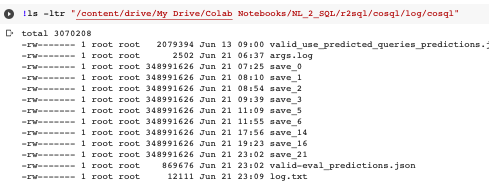

In [23]:
!ls -ltr "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql" 

total 5309676
-rw------- 1 root root        252 Jun 27 13:46 cosql_evaluate_ensemble.sh
drwx------ 2 root root       4096 Jun 27 13:46 data
-rw------- 1 root root       4893 Jun 27 13:46 cosql_test_ensemble.sh
drwx------ 2 root root       4096 Jun 27 13:53 local_param
drwx------ 2 root root       4096 Jun 27 13:53 log
drwx------ 2 root root       4096 Jun 27 13:54 model
drwx------ 2 root root       4096 Jun 27 13:55 __pycache__
drwx------ 2 root root       4096 Jun 27 13:55 submit_models
drwx------ 2 root root       4096 Jun 27 13:55 processed_data_cosql_removefrom
-rw------- 1 root root      22761 Jun 27 13:55 postprocess_eval.py
-rw------- 1 root root       7883 Jun 27 13:55 parse_args.py
-rw------- 1 root root      11212 Jun 27 13:55 run.py
-rw------- 1 root root 5437013780 Jun 27 13:55 glove_embeddings.pkl
-rw------- 1 root root        327 Jun 27 14:02 cosql_evaluate.sh
drwx------ 2 root root       4096 Jun 27 14:05 data_util
drwx------ 2 root root       4096 Jun 27 14:05 reranker


In [24]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql")

In [25]:
!pwd

/content/drive/My Drive/Colab Notebooks/NL_2_SQL/r2sql/cosql


In [26]:
!ls -ltr

total 5309676
-rw------- 1 root root        252 Jun 27 13:46 cosql_evaluate_ensemble.sh
drwx------ 2 root root       4096 Jun 27 13:46 data
-rw------- 1 root root       4893 Jun 27 13:46 cosql_test_ensemble.sh
drwx------ 2 root root       4096 Jun 27 13:53 local_param
drwx------ 2 root root       4096 Jun 27 13:53 log
drwx------ 2 root root       4096 Jun 27 13:54 model
drwx------ 2 root root       4096 Jun 27 13:55 __pycache__
drwx------ 2 root root       4096 Jun 27 13:55 submit_models
drwx------ 2 root root       4096 Jun 27 13:55 processed_data_cosql_removefrom
-rw------- 1 root root      22761 Jun 27 13:55 postprocess_eval.py
-rw------- 1 root root       7883 Jun 27 13:55 parse_args.py
-rw------- 1 root root      11212 Jun 27 13:55 run.py
-rw------- 1 root root 5437013780 Jun 27 13:55 glove_embeddings.pkl
-rw------- 1 root root        327 Jun 27 14:02 cosql_evaluate.sh
drwx------ 2 root root       4096 Jun 27 14:05 data_util
drwx------ 2 root root       4096 Jun 27 14:05 reranker


In [36]:
!sh cosql_test.sh

2021-06-27 15:01:36.030668: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
True
./submit_models/cosql_reranker_roberta.pt
load reranker model from  ./submit_models/cosql_reranker_roberta.pt
Loading preprocessed data from processed_data_cosql_removefrom/train.pkl
Loading preprocessed data from processed_data_cosql_removefrom/validation.pkl
Loaded vocabulary from processed_data_cosql_removefrom/input_vocabulary.pkl
Loaded vocabulary from processed_data_cosql_removefrom/schema_output_vocabulary.pkl
Loaded vocabulary from processed_data_cosql_removefrom/output_vocabulary.pkl
bert_config_file ./model/bert/data/annotated_wikisql_and_PyTorch_bert_param/bert_config_uncased_L-6_H-768_A-12.json
vocab_file ./model/bert/data/annotated_wikisql_and_PyTorch_bert_param/vocab_uncased_L-6_H-768_A-12.txt
init_checkpoint ./model/bert/data/annotated_wikisql_and_PyTorch_bert_param/pytorch_model_uncased_L-6_H-768_A-12.bin
DistilBertConfig

In [38]:
!sh cosql_evaluate.sh

2021-06-27 15:25:08.933966: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
True
./submit_models/cosql_reranker_roberta.pt
load reranker model from  ./submit_models/cosql_reranker_roberta.pt
Read prediction from results/save_14_predictions.json
Number of predictions 1006
Count 10 score_vis 4740
Count 20 score_vis 4740
Count 30 score_vis 4740
Count 40 score_vis 4740
Count 50 score_vis 4740
Count 60 score_vis 4740
Count 70 score_vis 4740
Count 80 score_vis 4740
Count 90 score_vis 4740
Count 100 score_vis 4740
Count 110 score_vis 4740
Count 120 score_vis 4740
Count 130 score_vis 4740
Count 140 score_vis 4740
Count 150 score_vis 4740
Count 160 score_vis 4740
Count 170 score_vis 4740
Count 180 score_vis 4740
Count 190 score_vis 4740
Count 200 score_vis 4740
Count 210 score_vis 4740
Count 220 score_vis 4740
Count 230 score_vis 4740
Count 240 score_vis 4740
Count 250 score_vis 4740
Count 260 score_vis 4740
Count 270 score_v

In [ ]:
!sh "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/cosql_train.sh"

Streaming output truncated to the last 5000 lines.
1459 college_1/20
last_losses 0.0002115566749125719 << 151548
last_losses 0.0065140794031322 << 151549
last_losses 0.020586054772138596 << 151550
0.00018289079889655113
1460 sports_competition/0
last_losses 4.410753263073275e-06 << 151551
last_losses 4.863827780354768e-05 << 151552
last_losses 7.850015390431508e-05 << 151553
last_losses 0.0032935775816440582 << 151554
3.058149013668299e-05
1461 bike_1/6
last_losses 0.0002463744312990457 << 151555
last_losses 0.09916973859071732 << 151556
last_losses 0.009964069351553917 << 151557
last_losses 0.0002852932666428387 << 151558
last_losses 0.08712766319513321 << 151559
0.0012812053319066763
1462 railway/10
last_losses 0.1463930904865265 << 151560
last_losses 0.014073455706238747 << 151561
last_losses 0.0025655324570834637 << 151562
0.0008491254411637783
1463 customers_and_invoices/7
last_losses 0.0035230754874646664 << 151563
last_losses 1.925237120303791e-05 << 151564
last_losses 3.0339044

nnnvvv,

lll

In [ ]:
#!python "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/preprocess.py" --dataset='cosql' --remove_from

2021-06-13 09:15:37.470857: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
load reranker model from  ./submit_models/cosql_reranker_roberta.pt
size of output_vocab 37
output_vocab ['_UNK', '_EOS', '=', 'select', 'value', ')', '(', 'where', ',', 'count', 'group_by', 'order_by', 'distinct', 'and', 'limit_value', 'limit', 'desc', '>', 'avg', 'having', 'max', 'in', '<', 'sum', 'intersect', 'not', 'min', 'except', 'or', 'asc', 'like', '!=', 'union', 'between', '-', '+', '/']

Reading spider database schema file
num_database 178 140 20
total number of schema_tokens / databases: 178
read_data_json data/cosql/train.json 2159
OOV! entrepreneur.investor!=
continue
OOV! gtype
continue
OOV! name!=
continue
OOV! tourist_details!=
continue
continue
OOV! whereclaim_status_name
continue
OOV! +sum
continue
OOV! is
continue
continue
read_data_json data/cosql/dev.json 293
continue
interaction_list length 160
train interaction:  2157
d

In [ ]:
#!sh "/content/drive/MyDrive/Colab Notebooks/NL_2_SQL/r2sql/cosql/cosql_train.sh"

Streaming output truncated to the last 5000 lines.
last_losses 3.54117488861084 << 17905
0.09450699388980865
1190 store_1/28
last_losses 3.4655418395996094 << 17906
last_losses 0.8360881805419922 << 17907
0.024441080167889595
1192 game_1/6
last_losses 3.169062376022339 << 17908
last_losses 6.714934825897217 << 17909
last_losses 8.749074935913086 << 17910
last_losses 0.10578463226556778 << 17911
0.11426132172346115
1193 student_assessment/9
last_losses 1.6442495584487915 << 17912
last_losses 1.6267457008361816 << 17913
last_losses 1.8230631351470947 << 17914
0.029847996309399605
1194 shop_membership/15
last_losses 1.5855404138565063 << 17915
last_losses 6.107015609741211 << 17916
last_losses 2.0818586349487305 << 17917
0.07636260986328125
1195 bike_1/17
last_losses 13.49937915802002 << 17918
last_losses 22.311445236206055 << 17919
last_losses 7.969060897827148 << 17920
0.12826138734817505
1196 riding_club/11
last_losses 0.9819937944412231 << 17921
last_losses 1.1653831005096436 << 17922